# Trabalho NLP - Desafio 01

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import unicodedata
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mbjesus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mbjesus/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Etapa 1 - Obter dados Rotulados

In [2]:
dataset = pd.read_csv("dataset/train.csv")

In [55]:
dataset

,title,category
0,tampa para champanhe cromado ibili - 722500,ice_buckets
1,copo térmico plástico os jetsons família espacial,thermal_cups_and_tumblers
2,nobreak sms bivolt 600va para pc ps4 xbox,stabilizers_and_ups
3,led de balada rgb luz de palco dj disco strobo...,led_stage_lights
4,filtro de lente cpl 52mm kenko polarizador par...,lens_filters
5,hb20 hb20s hb20x revisão hyundai 1.6 50 mil km...,engine_oil_dipsticks
6,roller row semi-pro cinza m tam. 33 a 36 patin...,roller_skates
7,kit para piscina de vinil 1 super led rgb + ca...,pool_lights
8,nobreak ups server p/ rack 19 3u 2200va 2x18a...,stabilizers_and_ups
9,porta chaves gaveta antiga.,key_racks


### 1.1 - Análise Descriva dos Dados

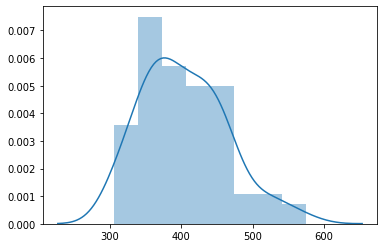

In [48]:
pd.value_counts(dataset["category"].values, sort=True)
sns.distplot(pd.value_counts(dataset["category"].values, sort=True))

Os dados estão desbalanceados na categoria.

## Etapa 2 - Pré-processamento 

### 2.1 - Converter para minúsculo

In [53]:
dataset["category"] = dataset["category"].str.lower()
dataset["title"] = dataset["title"].str.lower()

### 2.2 - Remover caractéres especiais

In [64]:
def removerAcentosECaracteresEspeciais(palavra):

    # Unicode normalize transforma um caracter em seu equivalente em latin.
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', ' ', palavraSemAcento)

In [67]:
dataset["title2"] = dataset["title"].map(removerAcentosECaracteresEspeciais)

In [66]:
dataset

,title,category,title2
0,tampa para champanhe cromado ibili - 722500,ice_buckets,tampa para champanhe cromado ibili 722500
1,copo térmico plástico os jetsons família espacial,thermal_cups_and_tumblers,copo termico plastico os jetsons familia espacial
2,nobreak sms bivolt 600va para pc ps4 xbox,stabilizers_and_ups,nobreak sms bivolt 600va para pc ps4 xbox
3,led de balada rgb luz de palco dj disco strobo...,led_stage_lights,led de balada rgb luz de palco dj disco strobo...
4,filtro de lente cpl 52mm kenko polarizador par...,lens_filters,filtro de lente cpl 52mm kenko polarizador par...
5,hb20 hb20s hb20x revisão hyundai 1.6 50 mil km...,engine_oil_dipsticks,hb20 hb20s hb20x revisao hyundai 1 6 50 mil km...
6,roller row semi-pro cinza m tam. 33 a 36 patin...,roller_skates,roller row semi pro cinza m tam 33 a 36 patin...
7,kit para piscina de vinil 1 super led rgb + ca...,pool_lights,kit para piscina de vinil 1 super led rgb ca...
8,nobreak ups server p/ rack 19 3u 2200va 2x18a...,stabilizers_and_ups,nobreak ups server p rack 19 3u 2200va 2x18a...
9,porta chaves gaveta antiga.,key_racks,porta chaves gaveta antiga


### 2.3 - Remover Stop-words

In [92]:

dataset
##baixar stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')

##criar tokens
dataset["tokens"] = [word_tokenize(i) for i in dataset["title2"]]


dataset

,title,category,title2,tokens
0,tampa para champanhe cromado ibili - 722500,ice_buckets,tampa para champanhe cromado ibili 722500,"[tampa, para, champanhe, cromado, ibili, 722500]"
1,copo térmico plástico os jetsons família espacial,thermal_cups_and_tumblers,copo termico plastico os jetsons familia espacial,"[copo, termico, plastico, os, jetsons, familia..."
2,nobreak sms bivolt 600va para pc ps4 xbox,stabilizers_and_ups,nobreak sms bivolt 600va para pc ps4 xbox,"[nobreak, sms, bivolt, 600va, para, pc, ps4, x..."
3,led de balada rgb luz de palco dj disco strobo...,led_stage_lights,led de balada rgb luz de palco dj disco strobo...,"[led, de, balada, rgb, luz, de, palco, dj, dis..."
4,filtro de lente cpl 52mm kenko polarizador par...,lens_filters,filtro de lente cpl 52mm kenko polarizador par...,"[filtro, de, lente, cpl, 52mm, kenko, polariza..."
5,hb20 hb20s hb20x revisão hyundai 1.6 50 mil km...,engine_oil_dipsticks,hb20 hb20s hb20x revisao hyundai 1 6 50 mil km...,"[hb20, hb20s, hb20x, revisao, hyundai, 1, 6, 5..."
6,roller row semi-pro cinza m tam. 33 a 36 patin...,roller_skates,roller row semi pro cinza m tam 33 a 36 patin...,"[roller, row, semi, pro, cinza, m, tam, 33, a,..."
7,kit para piscina de vinil 1 super led rgb + ca...,pool_lights,kit para piscina de vinil 1 super led rgb ca...,"[kit, para, piscina, de, vinil, 1, super, led,..."
8,nobreak ups server p/ rack 19 3u 2200va 2x18a...,stabilizers_and_ups,nobreak ups server p rack 19 3u 2200va 2x18a...,"[nobreak, ups, server, p, rack, 19, 3u, 2200va..."
9,porta chaves gaveta antiga.,key_racks,porta chaves gaveta antiga,"[porta, chaves, gaveta, antiga]"


### 2.4 - Transformar para Radical

### 2.5 - Tokenização

### 2.6 - Avaliar frequência dos tokens

### 2.7 - Gerar dois Corpus com 1 e 2 n-grans

### 2.8 - Obter Matriz 

### 2.9 - Aplicar TF-IDF

## Etapa 3 - Aplicar aprendizado de máquina 

Treinar SVM, Random Forest e Naive Bayes

### 3.1 - Aplicar holdout 70/30

### 3.2 - Realizar cross-validation com 10 folds e ajustar modelos com hiperparâmentros

### 3.3 - Comparar o resultado dos modelos e selecionar o melhor

## Etapa 4 - Avaliação

FIM! =D